## Exploratory data analysis (EDA)

**Table of contents**:
0. Packages and data loading
1. EDA
2. Feature engineering



### **0. Packages and data loading**

In [1]:
# Import packages
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.figure_factory as ff
import os
from scipy import stats
import seaborn as sns

In [2]:
# Set up the notebook
pd.set_option('display.max_columns', 200)

# Connect to google drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

# Specify a path to the working directory
PROJECT_PATH  = '/content/gdrive/MyDrive/94879_OpAI/final-project'
DATA_PATH     = os.path.join(PROJECT_PATH, 'data')

Mounted at /content/gdrive


In [4]:
# Load the clean data and display top-3 rows
df_clean = pd.read_csv(os.path.join(DATA_PATH, 'df_clean.csv'))
df_clean.head(3)

date  fips  mmwr_week    recip_county recip_state  completeness_pct  \
0  2020-12-13  1001         51  Autauga County          AL               0.0   
1  2020-12-14  1001         51  Autauga County          AL               0.0   
2  2020-12-15  1001         51  Autauga County          AL               0.0   

   administered_dose1_recip  administered_dose1_pop_pct  \
0                       0.0                         0.0   
1                       0.0                         0.0   
2                       0.0                         0.0   

   administered_dose1_recip_12plus  administered_dose1_recip_12pluspop_pct  \
0                              0.0                                     0.0   
1                              0.0                                     0.0   
2                              0.0                                     0.0   

   administered_dose1_recip_18plus  administered_dose1_recip_18pluspop_pct  \
0                              0.0                                     0.0   
1                              0.0                                     0.0   
2                              0.0                                     0.0   

   administered_dose1_recip_65plus  administered_dose1_recip_65pluspop_pct  \
0                              0.0                                     0.0   
1                              0.0                                     0.0   
2                              0.0                                     0.0   

   series_complete_yes  series_complete_pop_pct  series_complete_12plus  \
0                  0.0                      0.0                     0.0   
1                  0.0                      0.0                     0.0   
2                  0.0                      0.0                     0.0   

   series_complete_12pluspop_pct  series_complete_18plus  \
0                            0.0                     0.0   
1                            0.0                     0.0   
2                            0.0                     0.0   

   series_complete_18pluspop_pct  series_complete_65plus  \
0                            0.0                     0.0   
1                            0.0                     0.0   
2                            0.0                     0.0   

   series_complete_65pluspop_pct svi_ctgy  series_complete_pop_pct_svi  \
0                            0.0        B                     5.553957   
1                            0.0        B                     5.553957   
2                            0.0        B                     5.553957   

   series_complete_12pluspop_pct_svi  series_complete_18pluspop_pct_svi  \
0                           6.052158                           6.217626   
1                           6.052158                           6.217626   
2                           6.052158                           6.217626   

   series_complete_65pluspop_pct_svi metro_status  \
0                           6.769784        Metro   
1                           6.769784        Metro   
2                           6.769784        Metro   

   series_complete_pop_pct_ur_equity  series_complete_12pluspop_pct_ur_equity  \
0                           1.460432                                 1.969424   
1                           1.460432                                 1.969424   
2                           1.460432                                 1.969424   

   series_complete_18pluspop_pct_ur_equity  \
0                                 2.131295   
1                                 2.131295   
2                                 2.131295   

   series_complete_65pluspop_pct_ur_equity  census2019  census2019_12pluspop  \
0                                  2.68705     55869.0               47574.0   
1                                  2.68705     55869.0               47574.0   
2                                  2.68705     55869.0               47574.0   

   census2019_18pluspop          combined_key  population  deaths  
0               429

### **1. EDA**

---



#### Maps

First we will create maps that show how the number of deaths has changed over time for each state:

In [5]:
df_clean['recip_state'].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI',
       'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC',
       'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT',
       'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'PR'], dtype=object)

Let's aggregate our data per state per day. We'll do some sanity checks on what we expect our data to look like after aggregation.

In [6]:
len(df_clean['date'].unique())

589

We have data for 589 days

In [7]:
df_clean['date'].unique()[0]

'2020-12-13'

Starting with December 13th 2020

In [8]:
df_clean['date'].unique()[-1]

'2023-03-08'

Ending on March 8th 2023

Now let's aggregate our data:

In [9]:
# Group by 'date', 'state', and aggregate data
df_aggregated_state = df_clean.groupby(['date', 'recip_state']).agg({
    'deaths': 'sum',
    'administered_dose1_recip': 'sum', # People with at least one Dose by State of Residence
    'series_complete_yes': 'sum', # Total number of people who have completed a primary series (have second dose of a two-dose vaccine or one dose of a single-dose vaccine) based on the jurisdiction and county where vaccine recipient lives
    'census2019':'sum', # population from the census (obtained from the CDC website)
    'population':'sum' # population data from JHU
}).reset_index()

In [10]:
len(df_aggregated_state['date'].unique())

589

In [11]:
df_aggregated_state['date'].unique()[0]

'2020-12-13'

In [12]:
df_aggregated_state['date'].unique()[-1]

'2023-03-08'

In [13]:
df_aggregated_state.shape

(29983, 7)

In [14]:
589*51 # Value we would expect

30039

Now we'll create a map of how the deaths change for each state over time:

In [15]:
# Let's convert the date column to datetime format
df_aggregated_state['date'] = pd.to_datetime(df_aggregated_state['date'])

# # Quick test with December 2020 data to make sure we can make maps
# december_2020_df_state = df_aggregated_state[(df_aggregated_state['date'] >= '2020-12-24') & (df_aggregated_state['date'] <= '2020-12-31')]

In [16]:
# len(december_2020_df_state['date'].unique())

In [17]:
# december_2020_df_state.head()

In [18]:
# december_2020_df_state['deaths'].isnull().sum()

In [19]:
# state_row_counts = december_2020_df_state.groupby('NAME').size()

# # Check if all states have the same number of rows
# if state_row_counts.nunique() == 1:
#     print("All states have the same number of rows.")
#     print("Number of rows for each state:", state_row_counts.unique()[0])
# else:
#     print("States have different numbers of rows.")
#     print("Row counts for each state:\n", state_row_counts)

In [20]:
# states_in_df = set(december_2020_df_state['NAME'])
# states_in_geojson = set(feature['properties']['NAME'] for feature in geojson_data['features'])

# missing_states_in_df = states_in_geojson - states_in_df
# missing_states_in_geojson = states_in_df - states_in_geojson

# print("States missing in DataFrame:", missing_states_in_df)
# print("States missing in GeoJSON:", missing_states_in_geojson)

In [56]:
# Convert 'date' column to string format
df_aggregated_state['date'] = pd.to_datetime(df_aggregated_state['date']).dt.date
df_aggregated_state['date'] = df_aggregated_state['date'].astype(str)

In [57]:
# Assuming df_aggregated_state has a 'date' column
min_date = df_aggregated_state['date'].min()
max_date = df_aggregated_state['date'].max()

In [58]:
# Create Plotly Map for the selected date
fig = px.choropleth(
    df_aggregated_state,
    animation_frame='date',
    # geojson=geojson_data,
    locations='recip_state',  # Adjust to the correct column name
    locationmode="USA-states",
    color='deaths',
    color_continuous_scale="Viridis",
    range_color=(0, df_aggregated_state['deaths'].max()),
    scope="usa",
    title=f"Cumulative Covid-19 Deaths per State from {min_date} to {max_date}",
    labels={'deaths': 'Deaths'}
)

# Show Plot
fig.show()

Let's look at deaths per capita:

In [61]:
df_aggregated_state['deaths_per_100000'] = (df_aggregated_state['deaths'] / df_aggregated_state['census2019']) * 100000

In [62]:
df_aggregated_state['deaths_per_100000'].head()

0     23.949841
1     83.659907
2     97.587517
3    107.542934
4     42.361945
Name: deaths_per_100000, dtype: float64

In [63]:
# Create Plotly Map for the selected date
fig = px.choropleth(
    df_aggregated_state,
    animation_frame='date',
    # geojson=geojson_data,
    locations='recip_state',  # Adjust to the correct column name
    locationmode="USA-states",
    color='deaths_per_100000',
    color_continuous_scale="Viridis",
    range_color=(0, df_aggregated_state['deaths_per_100000'].max()),
    scope="usa",
    title=f"Cumulative Covid-19 Deaths per 100,000 for each State from {min_date} to {max_date}",
    labels={'deaths_per_100000': 'Death per 100,000 People'}
)

# Show Plot
fig.show()

# # Create Plotly Map for the selected date
# fig = px.choropleth(
#     df_aggregated_state,
#     animation_frame='date',
#     # geojson=geojson_data,
#     locations='recip_state',  # Adjust to the correct column name
#     locationmode="USA-states",
#     color='deaths_per_100000',
#     color_continuous_scale="Viridis",
#     range_color=(0, df_aggregated_state['deaths_per_100000'].max()),
#     scope="usa",
#     title=f"Cumulative Covid-19 Deaths per 100,000 for Each State from {min_date} to {max_date}",
#     labels={'deaths_per_100000': 'Death per 100,000 People'}
# )

# # Show Plot
# fig.show()

We'll create a similar map for the vaccination rate (per capita):

In [24]:
df_aggregated_state.head(100)

date recip_state  deaths  administered_dose1_recip  \
0   2020-12-13          AK   173.0                       0.0   
1   2020-12-13          AL  4102.0                       0.0   
2   2020-12-13          AR  2945.0                       0.0   
3   2020-12-13          AZ  3004.0                       0.0   
4   2020-12-13          CA  5085.0                       0.0   
..         ...         ...     ...                       ...   
95  2020-12-14          UT   313.0                       0.0   
96  2020-12-14          VA  3773.0                       0.0   
97  2020-12-14          VT    96.0                       0.0   
98  2020-12-14          WA  2002.0                       0.0   
99  2020-12-14          WI  4352.0                       0.0   

    series_complete_yes  census2019  population  
0                   0.0    722343.0    722343.0  
1                   0.0   4903185.0   4903185.0  
2                   0.0   3017804.0   3017804.0  
3                   0.0   2793303.0   2793303.0  
4                   0.0  12003698.0  12003698.0  
..                  ...         ...         ...  
95                  0.0   2045521.0   2045521.0  
96                  0.0   7387987.0   7387987.0  
97                  0.0    623989.0    623989.0  
98                  0.0   5362111.0   5362111.0  
99                  0.0   5822434.0   5822434.0  

[100 rows x 7 columns]

We need to create a column for percentage of the population in the state that has had their first dose administered and also completed the series. The definitions of the two columns are as follows:




administered_dose1_recip: People with at least one Dose by State of Residence





series_complete_yes: Total number of people who have completed a primary series (have second dose of a two-dose vaccine or one dose of a single-dose vaccine) based on the jurisdiction and county where vaccine recipient lives

In [25]:
df_aggregated_state['percent_administered_dose1_recip'] = df_aggregated_state['administered_dose1_recip'] / df_aggregated_state['population'] * 100

In [26]:
df_aggregated_state['percent_series_complete_yes'] = df_aggregated_state['series_complete_yes'] / df_aggregated_state['population'] * 100

In [27]:
rows_greater_than_100 = df_aggregated_state[df_aggregated_state['percent_administered_dose1_recip'] > 100]

In [28]:
rows_greater_than_100_MA = df_aggregated_state[(df_aggregated_state['percent_administered_dose1_recip'] > 100) & (df_aggregated_state['recip_state'] == 'MA')]

In [29]:
rows_greater_than_100_MA

date recip_state  deaths  administered_dose1_recip  \
18225  2021-12-05          MA  8513.0              3.755108e+06   
18276  2021-12-06          MA  8524.0              3.761430e+06   
18327  2021-12-07          MA  8549.0              3.764169e+06   
18378  2021-12-08          MA  8554.0              3.768267e+06   
18429  2021-12-09          MA  8577.0              3.774168e+06   
...           ...         ...     ...                       ...   
29750  2023-02-08          MA  8373.0              2.834414e+06   
29800  2023-02-15          MA  8422.0              2.835319e+06   
29850  2023-02-22          MA  8461.0              2.836411e+06   
29900  2023-03-01          MA  8501.0              2.837395e+06   
29950  2023-03-08          MA  8542.0              2.838175e+06   

       series_complete_yes  census2019  population  \
18225         3.149453e+06   3661148.0   3661148.0   
18276         3.156613e+06   3661148.0   3661148.0   
18327         3.159953e+06   3661148.0   3661148.0   
18378         3.163202e+06   3661148.0   3661148.0   
18429         3.168046e+06   3661148.0   3661148.0   
...                    ...         ...         ...   
29750         2.311166e+06   2150466.0   2150466.0   
29800         2.311721e+06   2150466.0   2150466.0   
29850         2.312148e+06   2150466.0   2150466.0   
29900         2.312584e+06   2150466.0   2150466.0   
29950         2.312995e+06   2150466.0   2150466.0   

       percent_administered_dose1_recip  percent_series_complete_yes  
18225                        102.566416                    86.023646  
18276                        102.739095                    86.219213  
18327                        102.813907                    86.310441  
18378                        102.925839                    86.399184  
18429                        103.087018                    86.531492  
...                                 ...                          ...  
29750                        131.804656                   107.472798  
29800                        131.846740                   107.498607  
29850                        131.897519                   107.518463  
29900                        131.943277                   107.538738  
29950                        131.979548                   107.557850  

[232 rows x 9 columns]

In [30]:
rows_greater_than_100

date recip_state  deaths  administered_dose1_recip  \
18225  2021-12-05          MA  8513.0              3.755108e+06   
18276  2021-12-06          MA  8524.0              3.761430e+06   
18327  2021-12-07          MA  8549.0              3.764169e+06   
18378  2021-12-08          MA  8554.0              3.768267e+06   
18429  2021-12-09          MA  8577.0              3.774168e+06   
...           ...         ...     ...                       ...   
29750  2023-02-08          MA  8373.0              2.834414e+06   
29800  2023-02-15          MA  8422.0              2.835319e+06   
29850  2023-02-22          MA  8461.0              2.836411e+06   
29900  2023-03-01          MA  8501.0              2.837395e+06   
29950  2023-03-08          MA  8542.0              2.838175e+06   

       series_complete_yes  census2019  population  \
18225         3.149453e+06   3661148.0   3661148.0   
18276         3.156613e+06   3661148.0   3661148.0   
18327         3.159953e+06   3661148.0   3661148.0   
18378         3.163202e+06   3661148.0   3661148.0   
18429         3.168046e+06   3661148.0   3661148.0   
...                    ...         ...         ...   
29750         2.311166e+06   2150466.0   2150466.0   
29800         2.311721e+06   2150466.0   2150466.0   
29850         2.312148e+06   2150466.0   2150466.0   
29900         2.312584e+06   2150466.0   2150466.0   
29950         2.312995e+06   2150466.0   2150466.0   

       percent_administered_dose1_recip  percent_series_complete_yes  
18225                        102.566416                    86.023646  
18276                        102.739095                    86.219213  
18327                        102.813907                    86.310441  
18378                        102.925839                    86.399184  
18429                        103.087018                    86.531492  
...                                 ...                          ...  
29750                        131.804656                   107.472798  
29800                        131.846740                   107.498607  
29850                        131.897519                   107.518463  
29900                        131.943277                   107.538738  
29950                        131.979548                   107.557850  

[255 rows x 9 columns]

In [31]:
rows_greater_than_100.recip_state.unique()

array(['MA', 'NH'], dtype=object)

In [37]:
column_name = 'percent_administered_dose1_recip'

# Set values over 100 to be 100
df_aggregated_state.loc[df_aggregated_state[column_name] > 100, column_name] = 100

In [65]:
# Create Plotly Map for the selected date
fig = px.choropleth(
    df_aggregated_state,
    animation_frame='date',
    # geojson=geojson_data,
    locations='recip_state',  # Adjust to the correct column name
    locationmode="USA-states",
    color='percent_administered_dose1_recip',
    color_continuous_scale="Viridis",
    range_color=(0, df_aggregated_state['percent_administered_dose1_recip'].max()),
    scope="usa",
    title=f"Percentage of People in a State with at least one dose from {min_date} to {max_date}",
    labels={'percent_administered_dose1_recip': 'Percentage'}
)

# Show Plot
fig.show()

In [39]:
column_name = 'percent_series_complete_yes'

# Set values over 100 to be 100
df_aggregated_state.loc[df_aggregated_state[column_name] > 100, column_name] = 100

In [66]:
# Create Plotly Map for the selected date
fig = px.choropleth(
    df_aggregated_state,
    animation_frame='date',
    # geojson=geojson_data,
    locations='recip_state',  # Adjust to the correct column name
    locationmode="USA-states",
    color='percent_series_complete_yes',
    color_continuous_scale="Viridis",
    range_color=(0, df_aggregated_state['percent_series_complete_yes'].max()),
    scope="usa",
    title=f"Percentage of People in a State With All Doses from {min_date} to {max_date}",
    labels={'percent_series_complete_yes': 'Percentage'}
)

# Show Plot
fig.show()

[NOT WORKING] Next we'll look at county level death and vaccination rates for the state of Pennsylvania:

In [34]:
# df_clean_PA = df_clean[df_clean['recip_state'] == 'PA']

In [35]:
# deaths_PA = df_clean_PA['deaths'].tolist()
# fips_PA = df_clean_PA['fips'].tolist()

# fig = ff.create_choropleth(fips=fips_PA, values=deaths_PA,scope=['PA'])
# fig.layout.template = None
# fig.show()

#### Age Related Plots

Now let's have a look at age group based data:

In [ ]:
df_clean.columns

Index(['date', 'fips', 'mmwr_week', 'recip_county', 'recip_state',
       'completeness_pct', 'administered_dose1_recip',
       'administered_dose1_pop_pct', 'administered_dose1_recip_12plus',
       'administered_dose1_recip_12pluspop_pct',
       'administered_dose1_recip_18plus',
       'administered_dose1_recip_18pluspop_pct',
       'administered_dose1_recip_65plus',
       'administered_dose1_recip_65pluspop_pct', 'series_complete_yes',
       'series_complete_pop_pct', 'series_complete_12plus',
       'series_complete_12pluspop_pct', 'series_complete_18plus',
       'series_complete_18pluspop_pct', 'series_complete_65plus',
       'series_complete_65pluspop_pct', 'svi_ctgy',
       'series_complete_pop_pct_svi', 'series_complete_12pluspop_pct_svi',
       'series_complete_18pluspop_pct_svi',
       'series_complete_65pluspop_pct_svi', 'metro_status',
       'series_complete_pop_pct_ur_equity',
       'series_complete_12pluspop_pct_ur_equity',
       'series_complete_18pluspop_p

In [ ]:
# Group by 'date', 'state', and aggregate data
df_aggregated_age = df_clean.groupby(['date',]).agg({
    'deaths': 'sum',
    'administered_dose1_recip_12plus' : 'sum', # People 12+ with at least one Dose by State of Residence
    'administered_dose1_recip_18plus' : 'sum', # People 18+ with at least one Dose by State of Residence
    'administered_dose1_recip_65plus' : 'sum' # People 65+ with at least one Dose by State of Residence
}).reset_index()


In [ ]:
# Create new columns for age ranges
df_aggregated_age['administered_dose1_recip_18to65'] = df_aggregated_age['administered_dose1_recip_18plus'] - df_aggregated_age['administered_dose1_recip_65plus']
df_aggregated_age['administered_dose1_recip_12to18'] = df_aggregated_age['administered_dose1_recip_12plus'] - df_aggregated_age['administered_dose1_recip_18plus']

In [ ]:
# Assuming df_aggregated_state is your DataFrame
fig = px.line(df_aggregated_age, x='date', y=['administered_dose1_recip_12to18', 'administered_dose1_recip_18to65', 'administered_dose1_recip_65plus'],
              labels={'value': 'Count', 'variable': 'Metric'},
              title='National Vaccinations Across Different Age Groups',
              line_group='variable',
              height=500)

# # Add 'deaths' column to a secondary y-axis
# fig.add_trace(px.line(df_aggregated_state, x='date', y='deaths').update_traces(dict(line_group='variable'), selector=dict(name='deaths')))

# # Adjust secondary y-axis label
# fig.update_layout(
#     yaxis2=dict(title='Deaths'),
#     legend_title_text='Metrics'
# )

fig.show()

In [ ]:
fig.write_html("file.html")

#### Correlation Plot/Heat Map

Now creating a correlation plot to start looking at how our features are related to each other and the y-value (deaths)

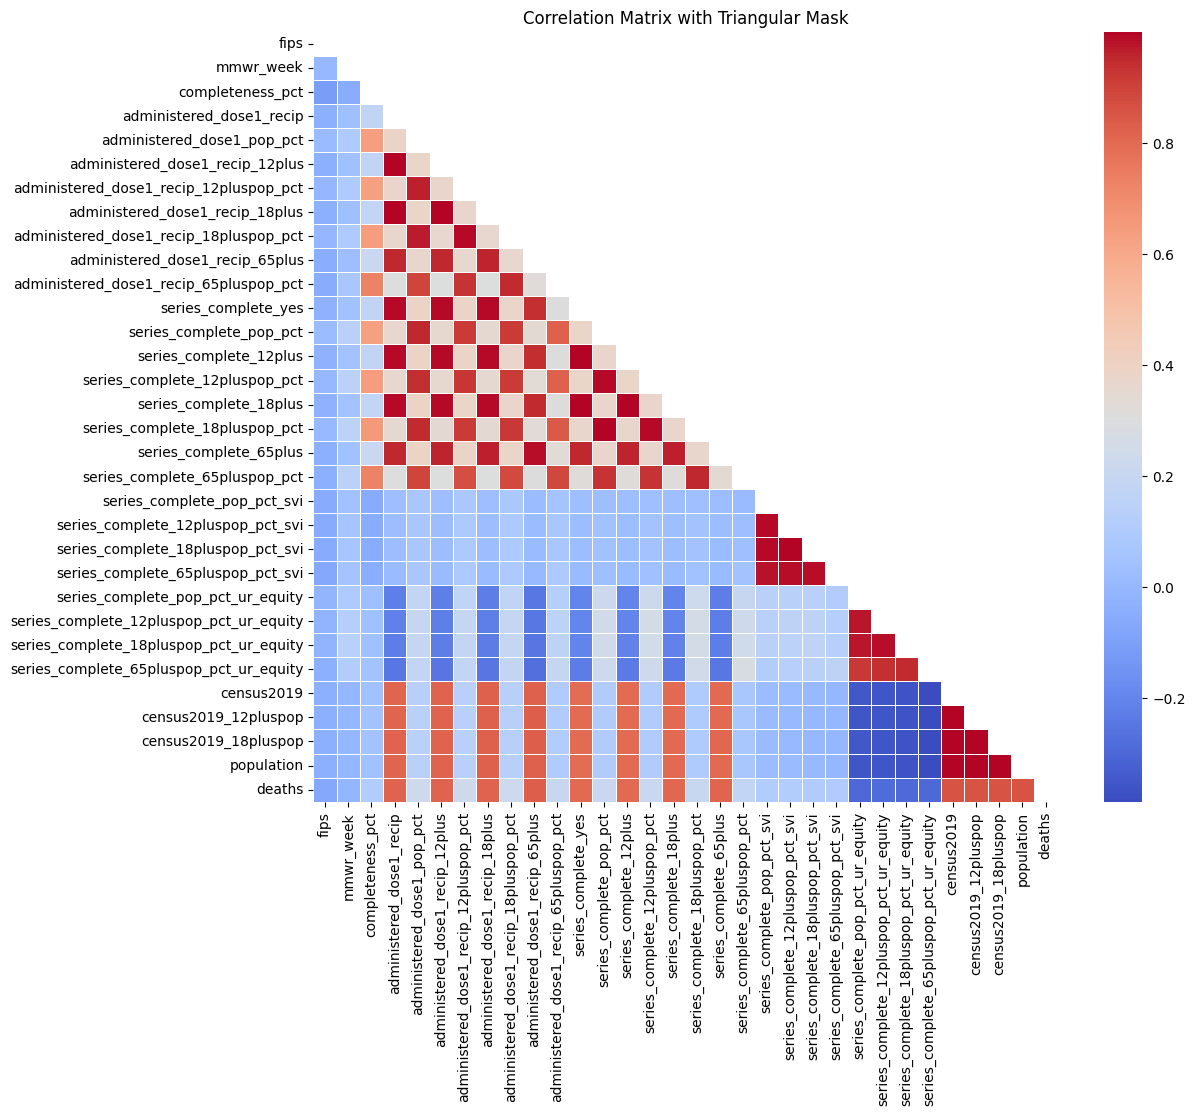

In [ ]:
# Drop non-numeric columns (if any) before calculating the correlation matrix
df_numeric = df_clean.select_dtypes(include='number')

# Calculate the correlation matrix
corr_matrix = df_numeric.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap with the triangular mask
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', mask=mask, fmt=".2f", linewidths=.5)

# Show the plot
plt.title('Correlation Matrix with Triangular Mask')
plt.show()

### **2. Feature engineering**